# Final Project Submission

Please fill out:
* Student name: **Brian Bentson**
* Student pace: self paced / part time / full time: **Full Time**
* Scheduled project review date/time:
* Instructor name: **James Irving**
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

# Table of Contents

*Click to jump to matching Markdown Header.*<br>
 
- **[INTRODUCTION](#INTRODUCTION)<br>**
- **[DATA COLLECTION](#DATA-COLLECTION)**<br>
- **[DATA CLEANING](#DATA-CLEANING)**<br>
- **[DATA EXPLORATION](#DATA-EXPLORATION)**<br>
- **[DATA MODELING](#DATA-MODELING)**<br>
- **[DATA INTERPRETATION](#DATA-INTERPRETATION)**<br>
- **[RECOMMENDATIONS AND CONCLUSIONS](#RECOMMENDATIONS-AND-CONCLUSIONS)<br>**

# INTRODUCTION

The Tanzanian Ministry of Water tracks vital information on water wells in its country to best ensure citizens are provided with a continual source of fresh water. A dataset housing this vital information can be found [HERE](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/). 

I will be utilizing this dataset to train a classification model to accurately predict which water wells are not functional and also to gain insights into potential reasons for water well failures.

## Business Statement

It is undoubtedly obvious how crucial a consistent water supply is to every living thing in this world. Without it, life is not sustainable. A human can survive without food on average for about 1 to 2 months. However, a human can only survive 3 days without water! This time-frame without water can be shortened even further in climates which are extremely hot and humid. Tanzania, located on the east coast of Africa on the Indian Ocean, has parts of the country that are extremely hot and humid. The average high and low temperature in the most populous city of Dar es Salaam during the year is 86$^\circ$F and 70$^\circ$F, respectively. Dar es Salaam is located on the coast and has a average relative humidity of 70%. 

It is, therefore, extremely imperative to be able to supply a consistent source of fresh water for sustainment of human life in Tanzania. This begins with the evaluation of water wells in Tanzania with an emphasis on how reliability can be maximized to ensure a consistent supply of water is attainable. Unfortunately, our reliance on equipment (in this case a mechanical pump) means that 100% reliability can never be achieved. It is best to consider both reliability of the equipment and how quickly we can respond to an equipment failure and get it back to a running state. The response time to fixing a mechanical failure can be shortened with first predicting which water wells will fail. This key information can help maintenance organizations to ensure they have labor, tools and supplies ready to be mobilized in case of a failure. I will use machine learning to build a model to best predict water well failures in an attempt to understand what improvements can be made to factors such as funding, technology and maintenance operations.



## Analysis Methodology

The dataset has information on 59,400 water wells in Tanzania, for which only 55% are fully operational based on this dataset. Information on these water wells includes many important factors that impact their operability and will be explored in order to provide insight into how reliability, and therefore accessibility, can be maximized. I will clean and explore the data to best be utilized with a classification machine learning model to predict failure. 

# DATA COLLECTION

## Import Packages

In [320]:
#data wrangling and visualization packages
import pandas as pd
import matplotlib.pyplot as plt

#feature engineering packages



#modeling packages
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV

#modeling evaluation packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [211]:
#notebook settings
pd.set_option("display.max_columns", 40)
pd.options.display.float_format = '{:,}'.format

## Global Functions

In [212]:
def cat_eval(df, col_names, label_count=50, thresh=0.025):
    '''
    
    '''
    for col in col_names:
                    
        print('=============================================================')
        print(f'Column Name: {col}')
        print('\n')
        num_unique = df[col].nunique()

        print(f'The number of unique labels is: {num_unique}')
        print('\n')
        print('Value Counts Percentage', '\n', 
              df[col].value_counts(normalize=True).round(2)*100)
        
        fig = plt.subplots(figsize=(15,8))
        fig = df[col].value_counts(normalize=True)[:label_count].plot.bar(label=f'{col} Percentage')
        fig.axhline(y=thresh, color='red', linestyle='--', label=f'{thresh*100}% Threshold')
        fig.set_title(f'{col} Value Counts')
        fig.set_xlabel(f'{col} Labels')
        fig.set_ylabel('Percentage')
        fig.legend()
        plt.show()
        print('\n')
        

In [213]:
def rare_labels(df, col_name, thresh=.01):

    df_temp = pd.Series(df[col_name].value_counts(normalize=True))

    rare_dict = {
        label: ('Other' if label not in df_temp[df_temp >= thresh].index else label)
        for label in df_temp.index
    }

    # now I replace the rare categories
    tmp = df[col_name].map(rare_dict)

    return tmp

## Import Data into Pandas

In [214]:
df_original = pd.read_csv('Data/water_well_data.csv')
df_original.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,...,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,"6,000.0",2011-03-14,Roman,1390,Roman,34.93809275,-9.85632177,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,...,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.6987661,-2.14746569,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,...,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.46066446,-3.82132853,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,...,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,...,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.13084671,-1.82535885,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,...,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Data Schema

**Taken from:** https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

- `amount_tsh` - Total static head (amount water available to waterpoint)
- `date_recorded` - The date the row was entered
- `funder` - Who funded the well
- `gps_height` - Altitude of the well
- `installer` - Organization that installed the well
- `longitude` - GPS coordinate
- `latitude` - GPS coordinate
- `wpt_name` - Name of the waterpoint if there is one
- `num_private` -
- `basin` - Geographic water basin
- `subvillage` - Geographic location
- `region` - Geographic location
- `region_code` - Geographic location (coded)
- `district_code` - Geographic location (coded)
- `lga` - Geographic location
- `ward` - Geographic location
- `population` - Population around the well
- `public_meeting` - True/False
- `recorded_by` - Group entering this row of data
- `scheme_management` - Who operates the waterpoint
- `scheme_name` - Who operates the waterpoint
- `permit` - If the waterpoint is permitted
- `construction_year` - Year the waterpoint was constructed
- `extraction_type` - The kind of extraction the waterpoint uses
- `extraction_type_group` - The kind of extraction the waterpoint uses
- `extraction_type_class` - The kind of extraction the waterpoint uses
- `management` - How the waterpoint is managed
- `management_group` - How the waterpoint is managed
- `payment` - What the water costs
- `payment_type` - What the water costs
- `water_quality` - The quality of the water
- `quality_group` - The quality of the water
- `quantity` - The quantity of water
- `quantity_group` - The quantity of water
- `source` - The source of the water
- `source_type` - The source of the water
- `source_class` - The source of the water
- `waterpoint_type` - The kind of waterpoint
- `waterpoint_type_group` - The kind of waterpoint


**Supplemental Resources**

Column abbrevation meanings: https://pdf.usaid.gov/pdf_docs/PA00JZJ5.pdf

## Investigate Data

In [215]:
#evaluate dataframe null values, column names and data types
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

> **OBSERVATIONS**
> - Many columns to explore for null value imputation
> - Column names are already standardized
> - Data types will require further evaluation during feature engineering

In [216]:
#evaluate numerical data descriptive statistics
df_original.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,"59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0"
mean,"37,115.131767676765",317.6503846801347,668.297239057239,34.077426692028794,-5.706032659626431,0.47414141414141414,15.297003367003366,5.629747474747475,179.90998316498317,"1,300.6524747474748"
std,"21,453.12837131775","2,997.574558142169",693.11635032505,6.567431845646531,2.946019081267248,12.236229810496686,17.58740633733205,9.633648629454566,471.48217573848035,951.6205473151729
min,0.0,0.0,-90.0,0.0,-11.64944018,0.0,1.0,0.0,0.0,0.0
25%,"18,519.75",0.0,0.0,33.09034738,-8.540621305,0.0,5.0,2.0,0.0,0.0
50%,"37,061.5",0.0,369.0,34.90874343,-5.021596649999999,0.0,12.0,3.0,25.0,"1,986.0"
75%,"55,656.5",20.0,"1,319.25",37.17838657,-3.3261556399999996,0.0,17.0,5.0,215.0,"2,004.0"
max,"74,247.0","350,000.0","2,770.0",40.34519307,-2e-08,"1,776.0",99.0,80.0,"30,500.0","2,013.0"


> **OBSERVATIONS**
> - Many of these numerical features should be transformed into a categorical feature
> - `num_private`, `construction_year`, `population`, and `district_code` has a minimum of 0 which may be a placeholder for unknown
> - `amount_tsh` needs to be explored further as there seem to be a lot of 0's as the median is 0 while the mean is 317.

In [217]:
#evaluate missing values
df_original.isna().mean()

id                                        0.0
amount_tsh                                0.0
date_recorded                             0.0
funder                     0.0611952861952862
gps_height                                0.0
installer                0.061531986531986535
longitude                                 0.0
latitude                                  0.0
wpt_name                                  0.0
num_private                               0.0
basin                                     0.0
subvillage              0.0062457912457912455
region                                    0.0
region_code                               0.0
district_code                             0.0
lga                                       0.0
ward                                      0.0
population                                0.0
public_meeting            0.05612794612794613
recorded_by                               0.0
scheme_management         0.06526936026936027
scheme_name                0.47417

> **OBSERVATIONS**
> - 6 features with missing values around 5-6% and 1 feature, `scheme_name`, with 47% missing values 

# DATA CLEANING

In this section, I will focus on understanding the raw data quality and cleaning the data in preparation for data exploration and visualization. Feature engineering for modeling will be done in the [DATA_MODELING](#DATA-MODELING) section.

In [218]:
#create a df_clean dataframe
df_clean = df_original.copy()

## Data Types

Here I will check feature data types, whether I need to make any feature drops and rename any numerical features.

In [219]:
#evaluate numeric columns
df_clean.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,...,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,"6,000.0",2011-03-14,Roman,1390,Roman,34.93809275,-9.85632177,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,...,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.6987661,-2.14746569,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,...,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.46066446,-3.82132853,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,...,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,...,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.13084671,-1.82535885,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,...,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


> **OBSERVATIONS**
> - `region_code` and `district_code` should be changed to categorical
> - `id` should be changed to categorical
> - `date_recorded` should be converted to a datetime object

> **ACTIONS**
> - convert `region_code`, and `district_code` to categorical features
> - convert `id` to categorical
> - convert `date_recorded` to a datetime object

In [220]:
#convert region_code to categorical
df_clean['region_code'] = df_clean['region_code'].astype('object')

In [221]:
#convert district_code to categorical
df_clean['district_code'] = df_clean['district_code'].astype('object')

In [222]:
#convert id to categorical
df_clean['id'] = df_clean['id'].astype('object')

In [223]:
#convert date_recorded to datetime object
df_clean['date_recorded'] = pd.to_datetime(df_clean['date_recorded'])

## Feature Drops

> **OBSERVATIONS**
> - `num_private` needs to be further evaluated for dropping
> - `funder` and `installer` need to be evaluated for similarity
> - `extraction_type`, `extraction_type_group` and `extraction_type_class` all seem equal
> - `quantity` and `quantity_group` seem equal
> - `source`, `source_type`, `source_class` need to be evaluated for similarity
> - `region` and `region_code` are redundant
> - `recorded_by` can be dropped, they all are recorded by the same company
> - `waterpoint_type_group` and `waterpoint_type` seem redundant to each other

> **ACTIONS**
> - evaluate `num_private` for dropping
> - evaluate `funder` and `installer` for feature drops
> - evaluate `extraction_type`, `extraction_type_group` and `extraction_type_class` for feature drops
> - evaluate `quantity` and `quantity_group` for feature drops
> - evaluate `source`, `source_type` and `source_class` for feature drops
> - drop `recorded_by` feature
> - drop `region_code`
> - evaluate `waterpoint_type_group` and `waterpoint_type` for feature drops

Column Name: num_private


The number of unique labels is: 65


Value Counts Percentage 
 0     99.0
6      0.0
1      0.0
5      0.0
8      0.0
      ... 
180    0.0
213    0.0
23     0.0
55     0.0
94     0.0
Name: num_private, Length: 65, dtype: float64


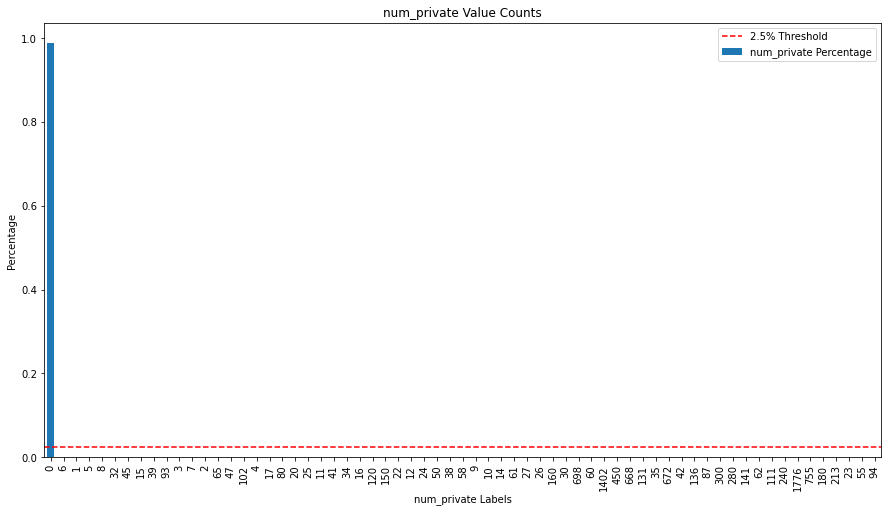

In [224]:
#evaluate num_private
cat_eval(df_clean,['num_private'], label_count=65)

> **OBSERVATIONS**
> - Because `num_private` is dominated by a single value (98.7% zero) and the data schema does not clearly state what it means, I will drop this column from the analysis.

> **ACTIONS**
> - Drop `num_private` column

In [225]:
#drop num_private 
df_clean.drop(columns='num_private', inplace=True)

Column Name: funder


The number of unique labels is: 1897


Value Counts Percentage 
 Government Of Tanzania   16.0
Danida                    6.0
Hesawa                    4.0
Rwssp                     2.0
World Bank                2.0
                         ... 
O                         0.0
Romam Catholic            0.0
Lc                        0.0
Mzee Shindika             0.0
Njula                     0.0
Name: funder, Length: 1897, dtype: float64


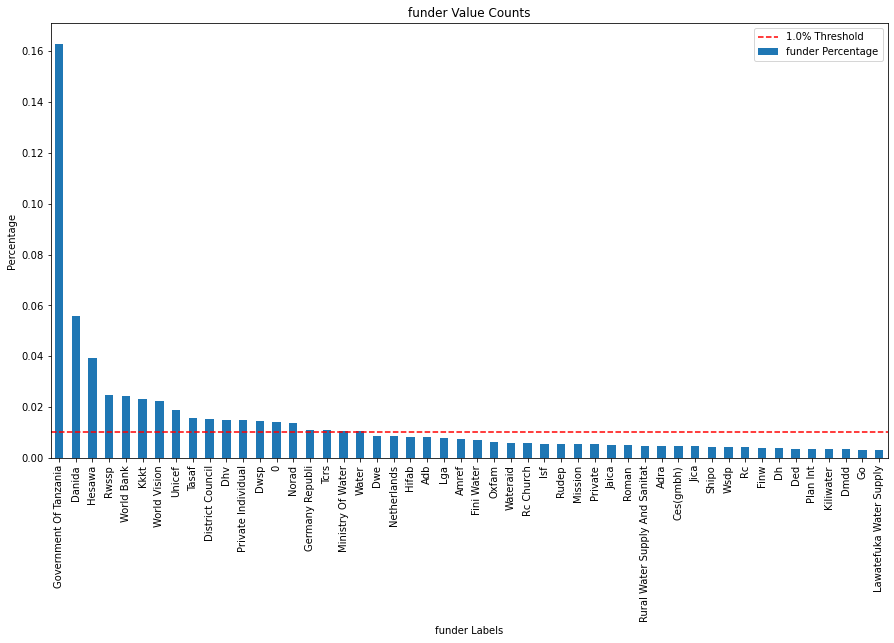



Column Name: installer


The number of unique labels is: 2145


Value Counts Percentage 
 DWE                  31.0
Government            3.0
RWE                   2.0
Commu                 2.0
DANIDA                2.0
                     ... 
Jumanne               0.0
TCRS a                0.0
Mama Agnes Kagimbo    0.0
O                     0.0
JI                    0.0
Name: installer, Length: 2145, dtype: float64


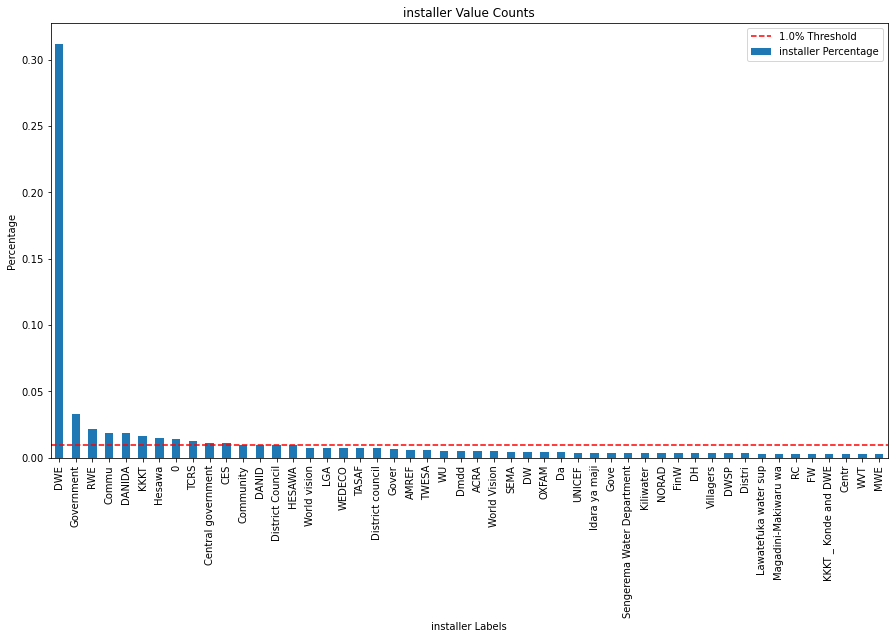

In [226]:
#evaluate funder and installer features for drops
cat_eval(df_clean, ['funder', 'installer'], thresh=0.01)

> **OBSERVATIONS**
> - These 2 columns are not similar but it does have a high cardinality (1897 unique labels) and rare labels.

> **ACTIONS**
> - I will combine labels in order to eliminate the high cardinality and rare labels.

In [227]:
#create 'other' consolidated label for funder
df_clean['funder'] = rare_labels(df_clean, 'funder', thresh=.01)

Column Name: funder


The number of unique labels is: 20


Value Counts Percentage 
 Other                    48.0
Government Of Tanzania   16.0
Danida                    6.0
Hesawa                    4.0
Rwssp                     2.0
World Bank                2.0
Kkkt                      2.0
World Vision              2.0
Unicef                    2.0
Tasaf                     2.0
District Council          2.0
Dhv                       1.0
Private Individual        1.0
Dwsp                      1.0
0                         1.0
Norad                     1.0
Germany Republi           1.0
Tcrs                      1.0
Ministry Of Water         1.0
Water                     1.0
Name: funder, dtype: float64


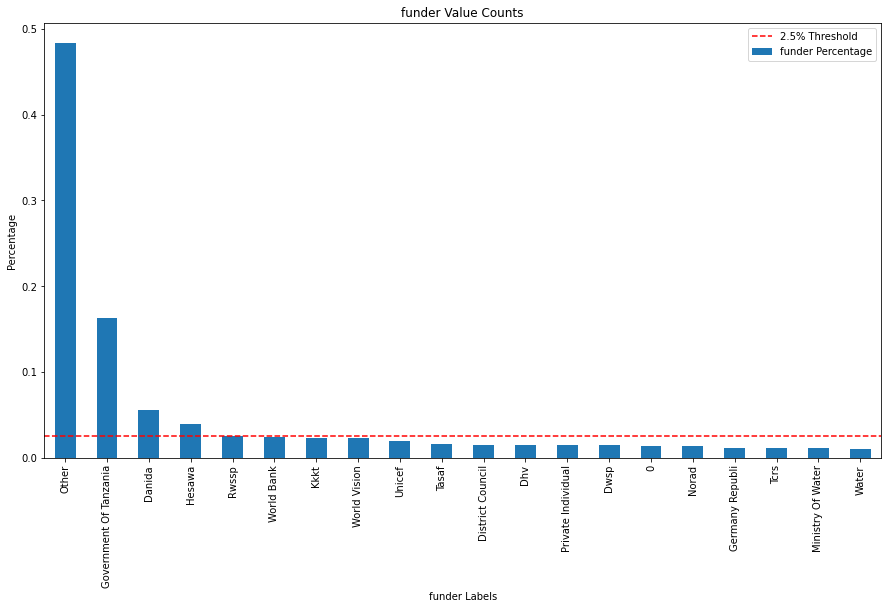

In [228]:
#review changes
cat_eval(df_clean, ['funder'])

> **OBSERVATIONS**
> - Label '0' doesn't seem right. 

> **ACTIONS**
> - Investigate alternative label names for '0'

In [229]:
df_clean.loc[df_clean['funder'] == '0']['installer'].value_counts()

0    777
Name: installer, dtype: int64

> **OBSERVATIONS**
> - both `funder` and `installer` are "0" 777 times. 

> **ACTIONS**
> - I will convert these to "Unknown".

In [230]:
#change "0" label to "Unknown" for funder and installer features
df_clean.loc[df_clean['funder'] == '0',['funder']] = 'Unknown'
df_clean.loc[df_clean['installer'] == '0',['installer']] = 'Unknown'

In [231]:
#create 'other' consolidated label for installer
df_clean['installer'] = rare_labels(df_clean, 'installer', thresh=.01)

Column Name: installer


The number of unique labels is: 12


Value Counts Percentage 
 Other                52.0
DWE                  31.0
Government            3.0
RWE                   2.0
Commu                 2.0
DANIDA                2.0
KKKT                  2.0
Hesawa                2.0
Unknown               1.0
TCRS                  1.0
Central government    1.0
CES                   1.0
Name: installer, dtype: float64


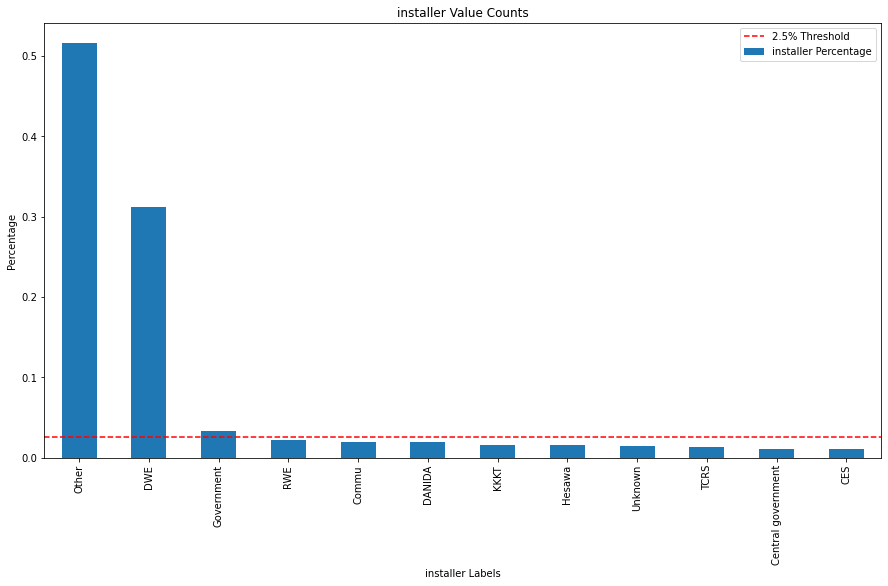

In [232]:
cat_eval(df_clean, ['installer'])

Column Name: extraction_type


The number of unique labels is: 18


Value Counts Percentage 
 gravity                                   45.0
nira/tanira                 14.000000000000002
other                                     11.0
submersible                                8.0
swn 80                                     6.0
mono                                       5.0
india mark ii                              4.0
afridev                                    3.0
ksb                                        2.0
other - rope pump                          1.0
other - swn 81                             0.0
windmill                                   0.0
india mark iii                             0.0
cemo                                       0.0
other - play pump                          0.0
walimi                                     0.0
climax                                     0.0
other - mkulima/shinyanga                  0.0
Name: extraction_type, dtype: float64


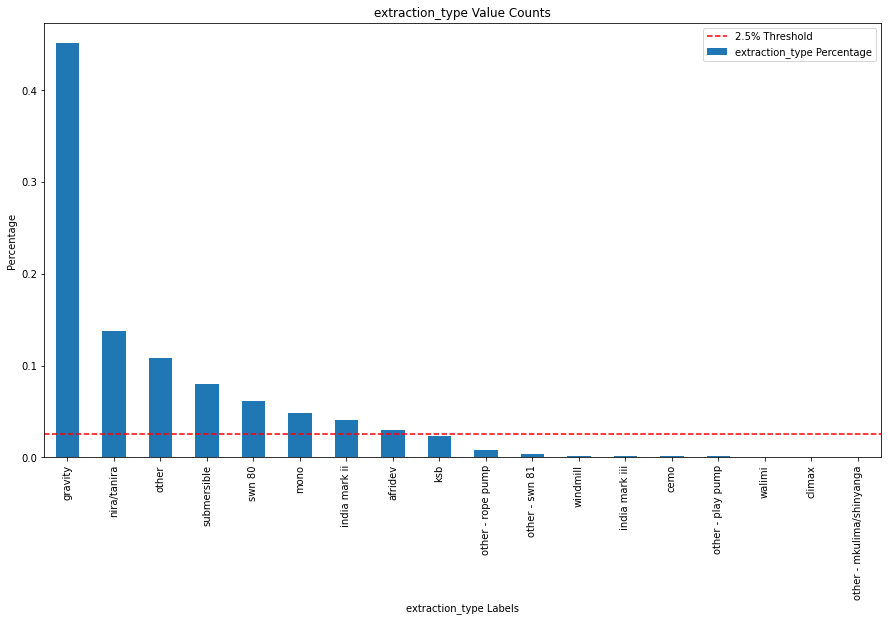



Column Name: extraction_type_group


The number of unique labels is: 13


Value Counts Percentage 
 gravity                         45.0
nira/tanira       14.000000000000002
other                           11.0
submersible                     10.0
swn 80                           6.0
mono                             5.0
india mark ii                    4.0
afridev                          3.0
rope pump                        1.0
other handpump                   1.0
other motorpump                  0.0
wind-powered                     0.0
india mark iii                   0.0
Name: extraction_type_group, dtype: float64


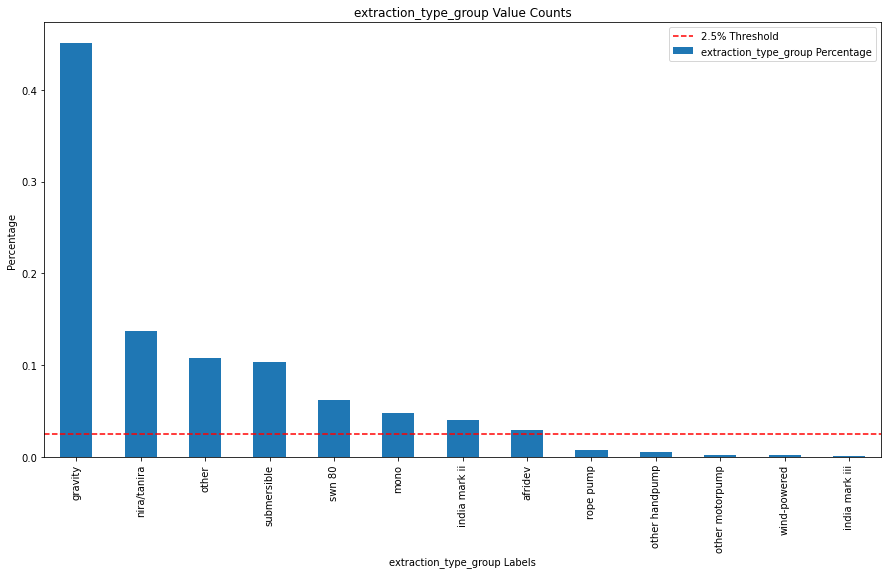



Column Name: extraction_type_class


The number of unique labels is: 7


Value Counts Percentage 
 gravity                      45.0
handpump       28.000000000000004
other                        11.0
submersible                  10.0
motorpump                     5.0
rope pump                     1.0
wind-powered                  0.0
Name: extraction_type_class, dtype: float64


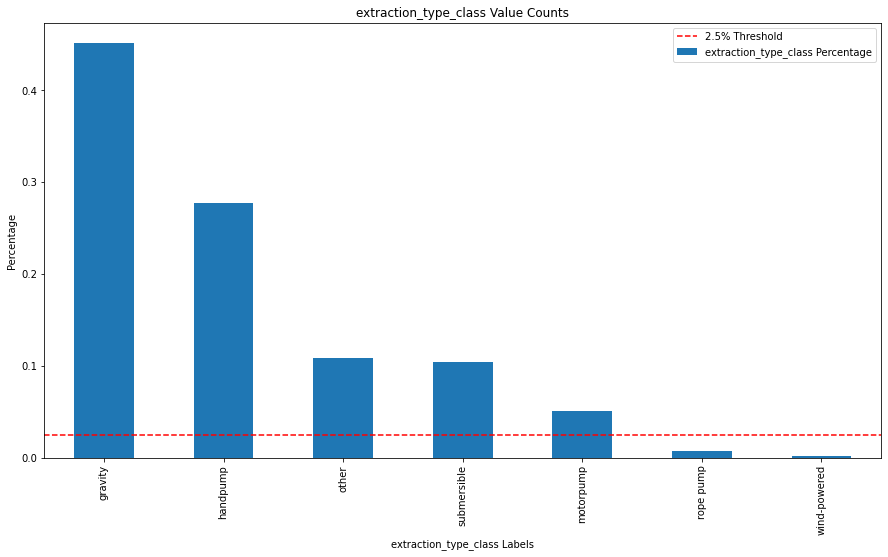

In [233]:
#evaluate extraction type features for drops
cat_eval(df_clean, ['extraction_type', 'extraction_type_group', 
                         'extraction_type_class'])

In [234]:
df_clean.groupby(by=['extraction_type_class','extraction_type_group','extraction_type']).count()

id  \
extraction_type_class extraction_type_group extraction_type                    
gravity               gravity               gravity                    26780   
handpump              afridev               afridev                     1770   
                      india mark ii         india mark ii               2400   
                      india mark iii        india mark iii                98   
                      nira/tanira           nira/tanira                 8154   
                      other handpump        other - mkulima/shinyanga      2   
                                            other - play pump             85   
                                            other - swn 81               229   
                                            walimi                        48   
                      swn 80                swn 80                      3670   
motorpump             mono                  mono                        2865   
                      other motorpump       cemo                          90   
                                            climax                        32   
other                 other                 other                       6430   
rope pump             rope pump             other - rope pump            451   
submersible           submersible           ksb                         1415   
                                            submersible                 4764   
wind-powered          wind-powered          windmill                     117   

                                                                       amount_tsh  \
extraction_type_class extraction_type_group extraction_type                         
gravity               gravity               gravity                         26780   
handpump              afridev               afridev                          1770   
                      india mark ii         india mark ii                    2400   
                      india mark iii        india mark iii                     98   
                      nira/tanira           nira/tanira                      8154   
                      other handpump        other - mkulima/shinyanga           2   
                                            other - play pump                  85   
                                            other - swn 81                    229   
                                            walimi                             48   
                      swn 80                swn 80                           3670   
motorpump             mono                  mono                             2865   
                      other motorpump       cemo                               90   
                                            climax                             32   
other                 other                 other                            6430   
rope pump             rope pump             other - rope pump                 451   
submersible           submersible           ksb                              1415   
                                            submersible                      4764   
wind-powered          wind-powered          windmill                          117   

                                                                       date_recorded  \
extraction_type_class extraction_type_group extraction_type                            
gravity               gravity               gravity                            26780   
handpump              afridev               afridev                             1770   
                      india mark ii         india mark ii                       2400   
                      india mark iii        india mark iii                        98   
                      nira/tanira           nira/tanira                         8154   
                      other handpump        other - mkulima/shinyanga              2   
                                            other - play pump       

> **OBSERVATIONS**
> - These columns are similar as they represent a hierarchical structure.

> **ACTIONS**
> - I will consolidate by removing the `extraction_type_group` feature as the labels are captured in more detail in the `extraction_type` feature. I will rename the columns and will also clean up the naming of the labels.

In [235]:
#remove extraction_type_group feature
df_clean.drop(columns='extraction_type_group', inplace=True)

In [236]:
#rename extraction_type_class feature as extraction_type_1
df_clean.rename(columns={'extraction_type_class':'extraction_type_1'}, inplace=True)
#rename extraction_type feature as extraction_type_2
df_clean.rename(columns={'extraction_type':'extraction_type_2'}, inplace=True)
df_clean.groupby(by=['extraction_type_1', 'extraction_type_2']).count()

id  amount_tsh  date_recorded  \
extraction_type_1 extraction_type_2                                             
gravity           gravity                    26780       26780          26780   
handpump          afridev                     1770        1770           1770   
                  india mark ii               2400        2400           2400   
                  india mark iii                98          98             98   
                  nira/tanira                 8154        8154           8154   
                  other - mkulima/shinyanga      2           2              2   
                  other - play pump             85          85             85   
                  other - swn 81               229         229            229   
                  swn 80                      3670        3670           3670   
                  walimi                        48          48             48   
motorpump         cemo                          90          90             90   
                  climax                        32          32             32   
                  mono                        2865        2865           2865   
other             other                       6430        6430           6430   
rope pump         other - rope pump            451         451            451   
submersible       ksb                         1415        1415           1415   
                  submersible                 4764        4764           4764   
wind-powered      windmill                     117         117            117   

                                             funder  gps_height  installer  \
extraction_type_1 extraction_type_2                                          
gravity           gravity                     24704       26780      24714   
handpump          afridev                      1668        1770       1665   
                  india mark ii                2358        2400       2358   
                  india mark iii                 98          98         98   
                  nira/tanira                  7899        8154       7885   
                  other - mkulima/shinyanga       1           2          2   
                  other - play pump              85          85         85   
                  other - swn 81                219         229        219   
                  swn 80                       3596        3670       3593   
                  walimi                         48          48         48   
motorpump         cemo                           90          90         90   
                  climax                         32          32         32   
                  mono                         2577        2865       2578   
other             other                        6010        6430       6002   
rope pump         other - rope pump             448         451        448   
submersible       ksb                          1411        1415       1410   
                  submersible                  4409        4764       4406   
wind-powered      windmill                      112         117        112   

                                             longitude  latitude  wpt_name  \
extraction_type_1 extraction_type_2                                          
gravity           gravity                        26780     26780     26780   
handpump          afridev                         1770      1770      1770   
                  india mark ii                   2400      2400      2400   
                  india mark iii                    98        98        98   
                  nira/tanira                     8154      8154      8154   
                  other - mkulima/shinyanga          2         2         2   
                  other - play pump                 85        85        85   
                  other - swn 81                   229       229       229   
                  swn 80                          3670      3670      3670   
        

Column Name: quantity


The number of unique labels is: 5


Value Counts Percentage 
 enough         56.00000000000001
insufficient                25.0
dry                         11.0
seasonal       7.000000000000001
unknown                      1.0
Name: quantity, dtype: float64


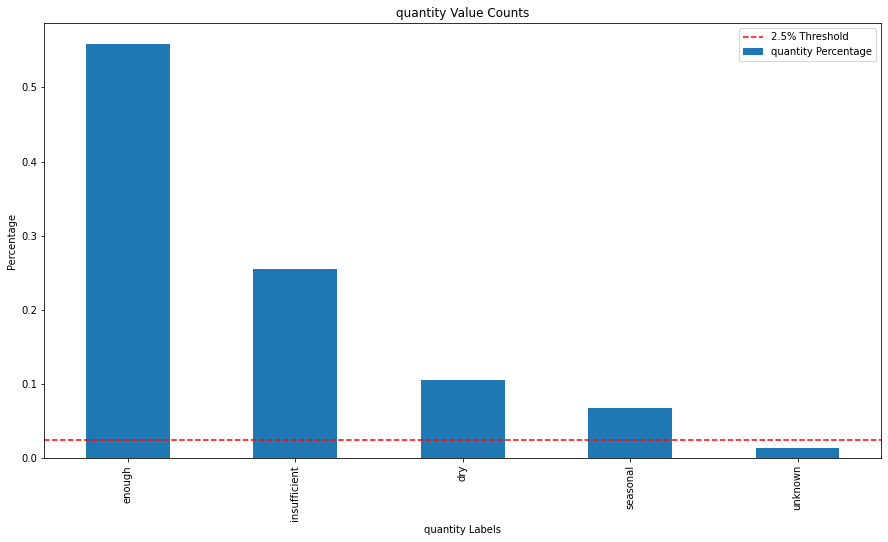



Column Name: quantity_group


The number of unique labels is: 5


Value Counts Percentage 
 enough         56.00000000000001
insufficient                25.0
dry                         11.0
seasonal       7.000000000000001
unknown                      1.0
Name: quantity_group, dtype: float64


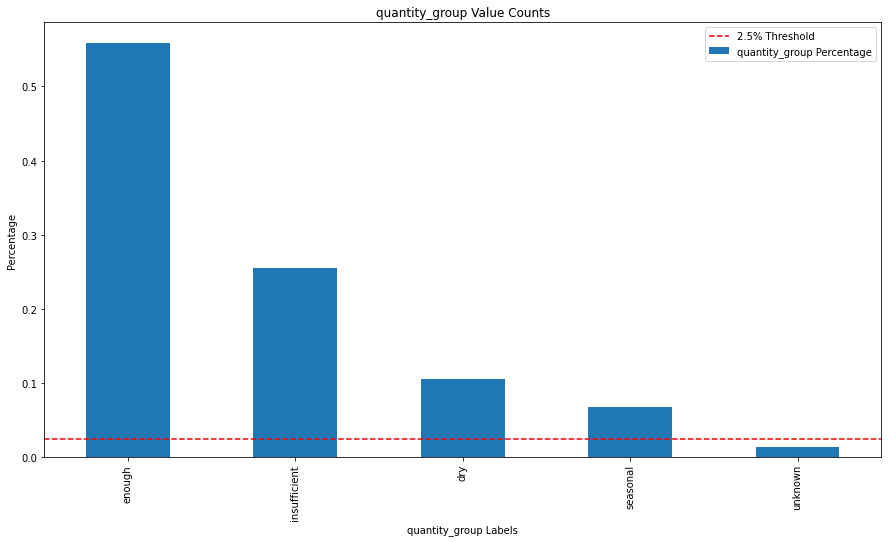

In [237]:
#evaluate quantity and quantity group
cat_eval(df_clean, ['quantity','quantity_group'])

In [238]:
df_clean.groupby(by=['quantity','quantity_group']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,management,management_group,payment,payment_type,water_quality,quality_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
quantity,quantity_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
dry,dry,6246,6246,6246,5781,6246,5782,6246,6246,6246,6246,6087,6246,6246,6246,6246,6246,6246,5786,6246,5974,3546,5836,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246
enough,enough,33186,33186,33186,31963,33186,31964,33186,33186,33186,33186,33087,33186,33186,33186,33186,33186,33186,31366,33186,31610,18363,31979,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186
insufficient,insufficient,15129,15129,15129,13950,15129,13940,15129,15129,15129,15129,15020,15129,15129,15129,15129,15129,15129,14569,15129,13710,8053,13934,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129
seasonal,seasonal,4050,4050,4050,3414,4050,3415,4050,4050,4050,4050,4046,4050,4050,4050,4050,4050,4050,3872,4050,3740,932,3901,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050
unknown,unknown,789,789,789,657,789,644,789,789,789,789,789,789,789,789,789,789,789,473,789,489,340,694,789,789,789,789,789,789,789,789,789,789,789,789,789,789,789


> **OBSERVATIONS**
> - `quantity` and `quantity_group` are the same. 

> **ACTIONS**
> - I will drop `quantity_group`

In [239]:
#drop the quantity_group feature
df_clean.drop(columns='quantity_group', inplace=True)

Column Name: source


The number of unique labels is: 10


Value Counts Percentage 
 spring                 28.999999999999996
shallow well           28.000000000000004
machine dbh                          19.0
river                                16.0
rainwater harvesting                  4.0
hand dtw                              1.0
lake                                  1.0
dam                                   1.0
other                                 0.0
unknown                               0.0
Name: source, dtype: float64


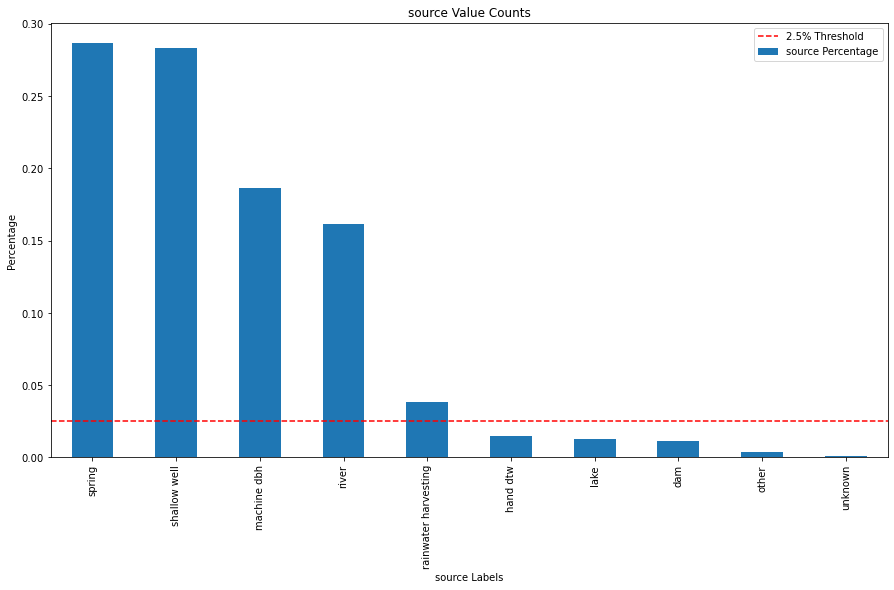



Column Name: source_type


The number of unique labels is: 7


Value Counts Percentage 
 spring                 28.999999999999996
shallow well           28.000000000000004
borehole                             20.0
river/lake                           17.0
rainwater harvesting                  4.0
dam                                   1.0
other                                 0.0
Name: source_type, dtype: float64


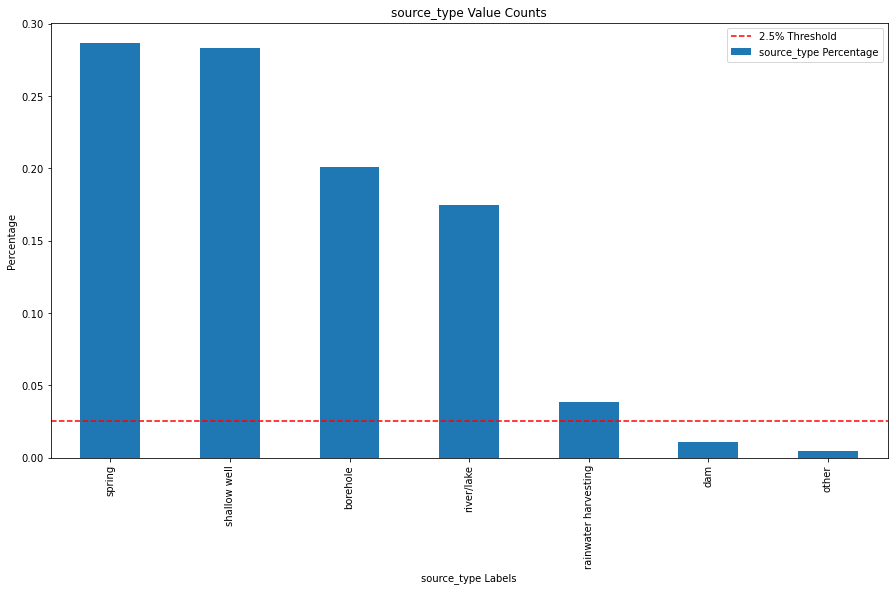



Column Name: source_class


The number of unique labels is: 3


Value Counts Percentage 
 groundwater   77.0
surface       22.0
unknown        0.0
Name: source_class, dtype: float64


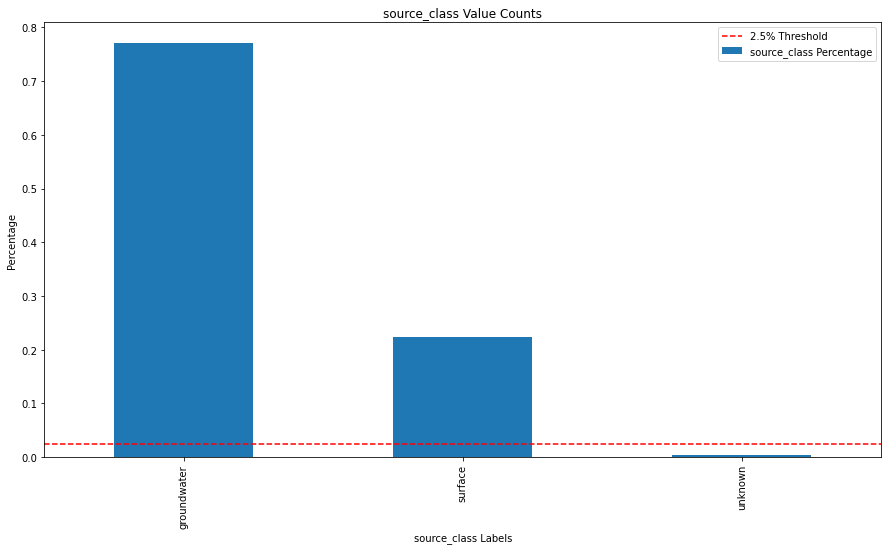

In [240]:
#evaluate the source, source_type, source_class features
cat_eval(df_clean, ['source','source_type','source_class'])

In [241]:
#groupby to see redundancy
df_clean.groupby(by=['source_class','source_type','source']).count()

id  amount_tsh  \
source_class source_type          source                                    
groundwater  borehole             hand dtw                874         874   
                                  machine dbh           11075       11075   
             shallow well         shallow well          16824       16824   
             spring               spring                17021       17021   
surface      dam                  dam                     656         656   
             rainwater harvesting rainwater harvesting   2295        2295   
             river/lake           lake                    765         765   
                                  river                  9612        9612   
unknown      other                other                   212         212   
                                  unknown                  66          66   

                                                        date_recorded  funder  \
source_class source_type          source                                        
groundwater  borehole             hand dtw                        874     868   
                                  machine dbh                   11075   10252   
             shallow well         shallow well                  16824   16302   
             spring               spring                        17021   15870   
surface      dam                  dam                             656     647   
             rainwater harvesting rainwater harvesting           2295    2099   
             river/lake           lake                            765     763   
                                  river                          9612    8715   
unknown      other                other                           212     204   
                                  unknown                          66      45   

                                                        gps_height  installer  \
source_class source_type          source                                        
groundwater  borehole             hand dtw                     874        868   
                                  machine dbh                11075      10246   
             shallow well         shallow well               16824      16286   
             spring               spring                     17021      15870   
surface      dam                  dam                          656        646   
             rainwater harvesting rainwater harvesting        2295       2096   
             river/lake           lake                         765        762   
                                  river                       9612       8721   
unknown      other                other                        212        204   
                                  unknown                       66         46   

                                                        longitude  latitude  \
source_class source_type          source                                      
groundwater  borehole             hand dtw                    874       874   
                                  machine dbh               11075     11075   
             shallow well         shallow well              16824     16824   
             spring               spring                    17021     17021   
surface      dam                  dam                         656       656   
             rainwater harvesting rainwater harvesting       2295      2295   
             river/lake           lake                        765       765   
                                  river                      9612      9612   
unknown      other                other                       212       212   
                                  unknown                      66        66   

                                                        wpt_name  basin  \
source_class source_type          source                                  
groundwater  borehole             hand dtw                   874    874   
              

> **OBSERVATIONS**
> - `source_type` is redundant information

> **ACTIONS**
> - I will remove `source_type` and rename `source_class` as `source_type_1` and `source` as `source_type_2`

In [242]:
#remove source_type feature
df_clean.drop(columns='source_type', inplace=True)

In [243]:
#rename source features
df_clean.rename(columns={'source_class':'source_type_1',
                         'source':'source_type_2'},inplace=True)

In [244]:
#drop recorded_by feature
df_clean.drop(columns='recorded_by', inplace=True)

In [245]:
#drop region_code feature
df_clean.drop(columns='region_code', inplace=True)

Column Name: waterpoint_type


The number of unique labels is: 7


Value Counts Percentage 
 communal standpipe                          48.0
hand pump                     28.999999999999996
other                                       11.0
communal standpipe multiple                 10.0
improved spring                              1.0
cattle trough                                0.0
dam                                          0.0
Name: waterpoint_type, dtype: float64


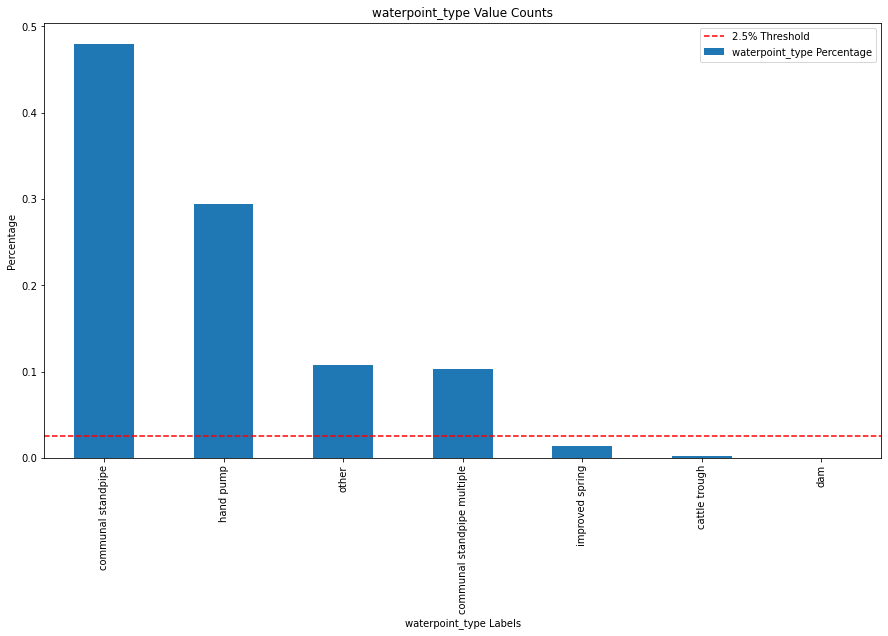



Column Name: waterpoint_type_group


The number of unique labels is: 6


Value Counts Percentage 
 communal standpipe    57.99999999999999
hand pump            28.999999999999996
other                              11.0
improved spring                     1.0
cattle trough                       0.0
dam                                 0.0
Name: waterpoint_type_group, dtype: float64


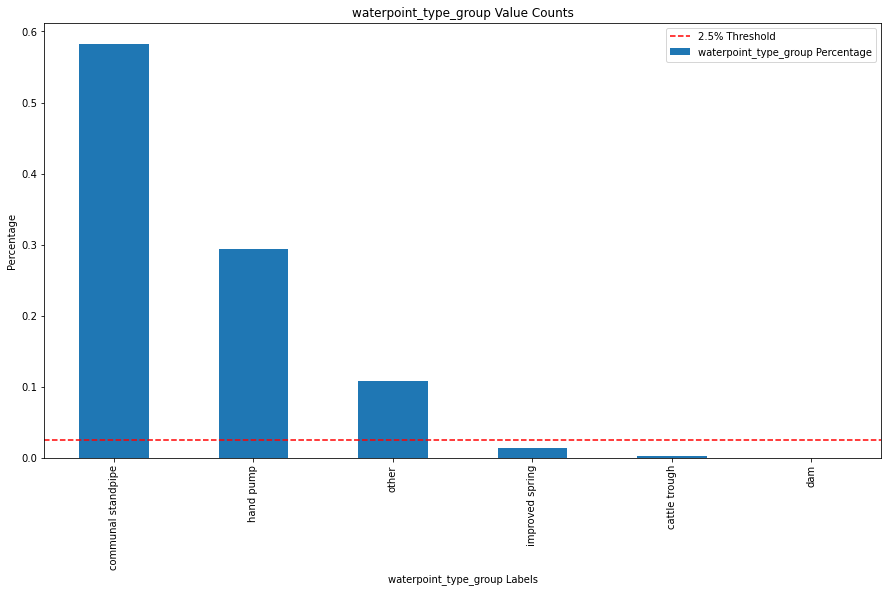

In [246]:
#evaluation waterpoint_type and waterpoint_type_group
cat_eval(df_clean, ['waterpoint_type','waterpoint_type_group'])

In [247]:
#groupby to see redundancy
df_clean.groupby(by=['waterpoint_type','waterpoint_type_group']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source_type_2,source_type_1,status_group
waterpoint_type,waterpoint_type_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cattle trough,cattle trough,116,116,116,113,116,110,116,116,116,116,116,116,116,116,116,116,114,113,71,88,116,116,116,116,116,116,116,116,116,116,116,116,116
communal standpipe,communal standpipe,28522,28522,28522,25778,28522,25790,28522,28522,28522,28522,28407,28522,28522,28522,28522,28522,27196,28030,23049,26368,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522
communal standpipe multiple,communal standpipe,6103,6103,6103,6064,6103,6063,6103,6103,6103,6103,5859,6103,6103,6103,6103,6103,5815,6032,5218,6051,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103
dam,dam,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,6,7,7,7,7,7,7,7,7,7,7,7,7,7
hand pump,hand pump,17488,17488,17488,16997,17488,16977,17488,17488,17488,17488,17485,17488,17488,17488,17488,17488,16255,15368,1468,16978,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488
improved spring,improved spring,784,784,784,743,784,748,784,784,784,784,784,784,784,784,784,784,773,701,83,780,784,784,784,784,784,784,784,784,784,784,784,784,784
other,other,6380,6380,6380,6063,6380,6050,6380,6380,6380,6380,6371,6380,6380,6380,6380,6380,5906,5272,1340,6073,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380


> **OBSERVATIONS**
> - features are the essentially the same. `waterpoint_type` has more granularity so will keep

> **ACTIONS**
> - Remove `waterpoint_type_group` feature

In [248]:
#remove waterpoint_type_group
df_clean.drop(columns='waterpoint_type_group', inplace=True)

In [249]:
#review data
df_clean.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source_type_2,source_type_1,waterpoint_type,status_group
0,69572,"6,000.0",2011-03-14,Other,1390,Other,34.93809275,-9.85632177,none,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,spring,groundwater,communal standpipe,functional
1,8776,0.0,2013-03-06,Other,1399,Other,34.6987661,-2.14746569,Zahanati,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280,NaN,Other,NaN,True,2010,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,2013-02-25,Other,686,Other,37.46066446,-3.82132853,Kwa Mahundi,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,dam,surface,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,Unicef,263,Other,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,NaN,True,1986,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,Other,0,Other,31.13084671,-1.82535885,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,0,True,NaN,NaN,True,0,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional


> **OBSERVATIONS**
> - `management` and `management_group` can be consolidated
> - `payment` and `payment_type` seem redundant

> **ACTIONS**
> - consolidate `management` and `management_group`
> - evaluate `payment` and `payment_type` for feature removal

Column Name: management


The number of unique labels is: 12


Value Counts Percentage 
 vwc                68.0
wug                11.0
water board         5.0
wua                 4.0
private operator    3.0
parastatal          3.0
water authority     2.0
other               1.0
company             1.0
unknown             1.0
other - school      0.0
trust               0.0
Name: management, dtype: float64


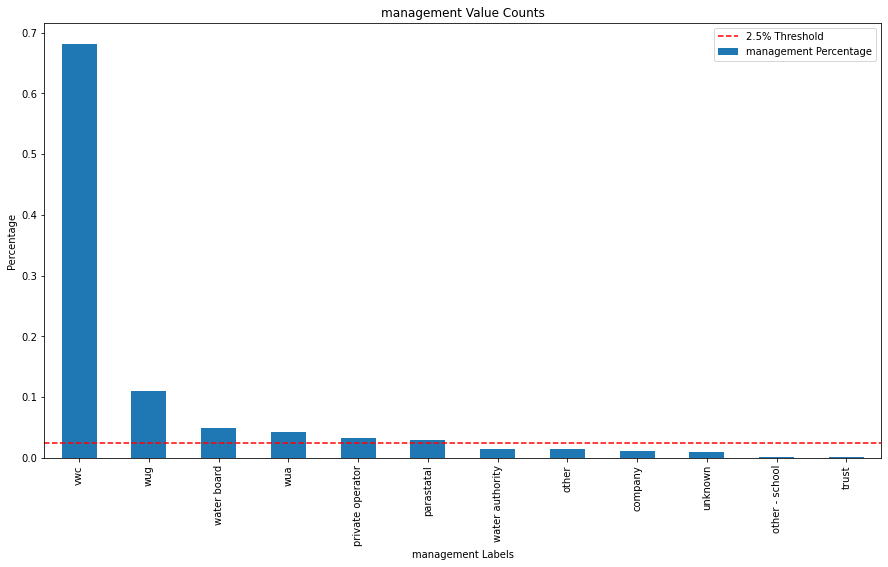



Column Name: management_group


The number of unique labels is: 5


Value Counts Percentage 
 user-group   88.0
commercial    6.0
parastatal    3.0
other         2.0
unknown       1.0
Name: management_group, dtype: float64


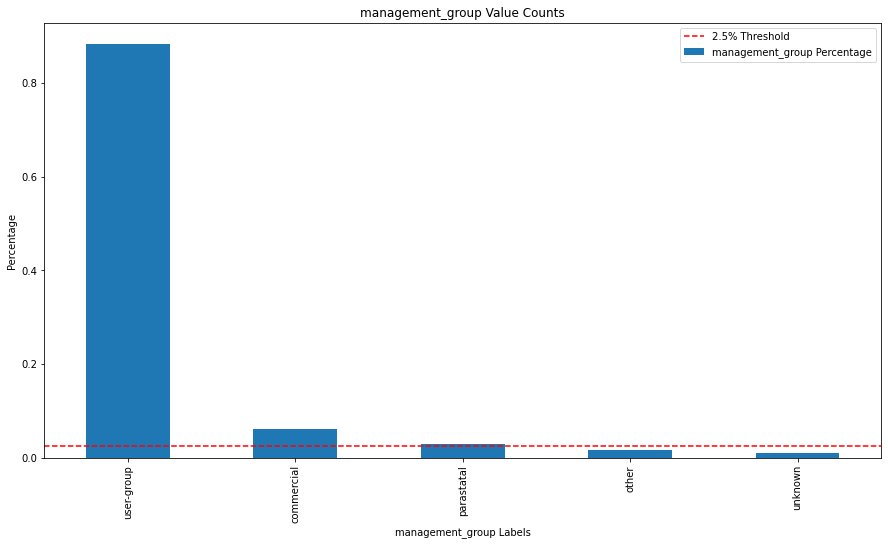

In [250]:
#evaluate management and management_group for dropping
cat_eval(df_clean, ['management','management_group'])

In [251]:
#evaluate management and management_group for dropping
df_clean.groupby(by=['management','management_group']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,payment,payment_type,water_quality,quality_group,quantity,source_type_2,source_type_1,waterpoint_type,status_group
management,management_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
company,commercial,685,685,685,663,685,663,685,685,685,685,685,685,685,685,685,685,684,684,655,658,685,685,685,685,685,685,685,685,685,685,685,685
other,other,844,844,844,837,844,831,844,844,844,844,839,844,844,844,844,844,689,658,270,744,844,844,844,844,844,844,844,844,844,844,844,844
other - school,other,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,0,99,99,99,99,99,99,99,99,99,99,99,99,99
parastatal,parastatal,1768,1768,1768,1624,1768,1626,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1518,1757,604,1595,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768
private operator,commercial,1971,1971,1971,1957,1971,1959,1971,1971,1971,1971,1932,1971,1971,1971,1971,1971,1660,1852,992,1893,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971
trust,commercial,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,26,77,78,78,78,78,78,78,78,78,78,78,78,78
unknown,unknown,561,561,561,533,561,527,561,561,561,561,561,561,561,561,561,561,301,93,240,519,561,561,561,561,561,561,561,561,561,561,561,561
vwc,user-group,40507,40507,40507,37632,40507,37630,40507,40507,40507,40507,40189,40507,40507,40507,40507,40507,39208,38057,22083,38296,40507,40507,40507,40507,40507,40507,40507,40507,40507,40507,40507,40507
water authority,commercial,904,904,904,836,904,836,904,904,904,904,895,904,904,904,904,904,878,902,624,825,904,904,904,904,904,904,904,904,904,904,904,904


> **OBSERVATIONS**
> - `management_group` is redundant

> **ACTIONS**
> - drop `management_group`

In [252]:
#remove management_group
df_clean.drop(columns='management_group', inplace=True)

Column Name: payment


The number of unique labels is: 7


Value Counts Percentage 
 never pay                             43.0
pay per bucket                        15.0
pay monthly             14.000000000000002
unknown                 14.000000000000002
pay when scheme fails    7.000000000000001
pay annually                           6.0
other                                  2.0
Name: payment, dtype: float64


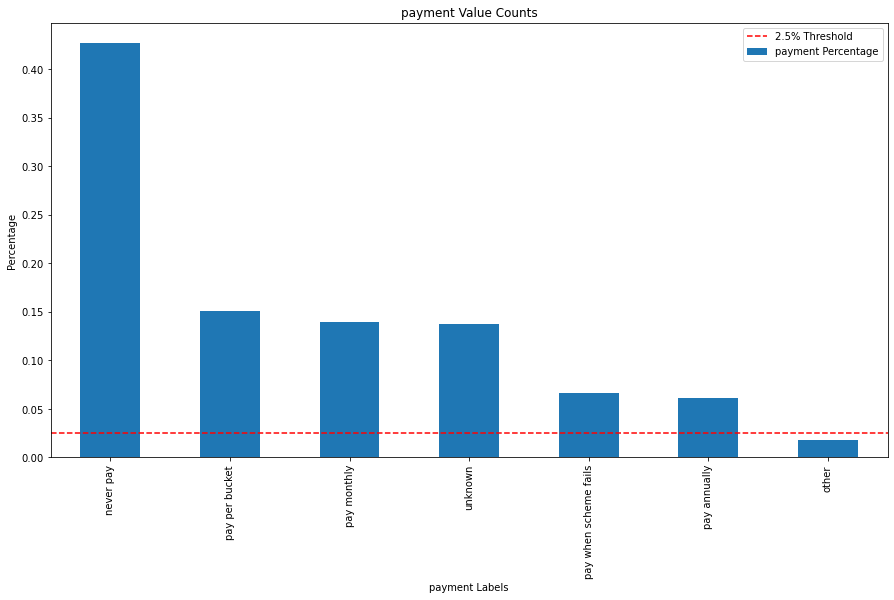



Column Name: payment_type


The number of unique labels is: 7


Value Counts Percentage 
 never pay                  43.0
per bucket                 15.0
monthly      14.000000000000002
unknown      14.000000000000002
on failure    7.000000000000001
annually                    6.0
other                       2.0
Name: payment_type, dtype: float64


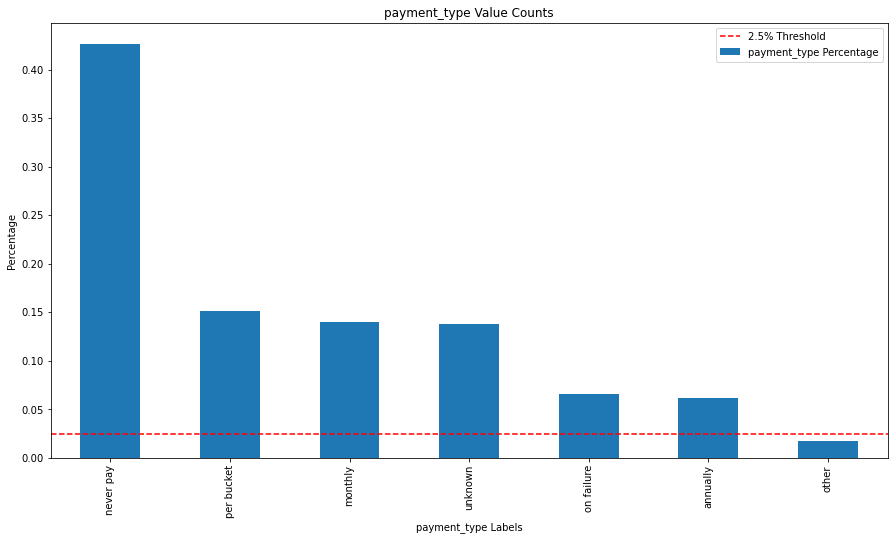

In [253]:
#evaluate payment and payment_type
cat_eval(df_clean, ['payment','payment_type'])

In [254]:
#evaluate payment and payment_type
df_clean.groupby(by=['payment','payment_type']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,management,water_quality,quality_group,quantity,source_type_2,source_type_1,waterpoint_type,status_group
payment,payment_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
never pay,never pay,25348,25348,25348,23440,25348,23443,25348,25348,25348,25348,25246,25348,25348,25348,25348,25348,24594,23604,11385,23776,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348
other,other,1054,1054,1054,1038,1054,1039,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,977,1028,220,995,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
pay annually,annually,3642,3642,3642,3533,3642,3529,3642,3642,3642,3642,3591,3642,3642,3642,3642,3642,3626,3604,2355,3585,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642
pay monthly,monthly,8300,8300,8300,8084,8300,8083,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8226,7877,5970,8221,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300
pay per bucket,per bucket,8985,8985,8985,8717,8985,8711,8985,8985,8985,8985,8767,8985,8985,8985,8985,8985,8552,8816,6707,8700,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985
pay when scheme fails,on failure,3914,3914,3914,3869,3914,3872,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3896,3793,1264,3777,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914
unknown,unknown,8157,8157,8157,7084,8157,7068,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,6195,6801,3333,7290,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157


> **OBSERVATIONS**
> - `payment_type` is redundant

> **ACTIONS**
> - drop `payment_type`

In [255]:
#remove payment_type
df_clean.drop(columns='payment_type', inplace=True)

In [256]:
#review dataset
df_clean.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,management,payment,water_quality,quality_group,quantity,source_type_2,source_type_1,waterpoint_type,status_group
0,69572,"6,000.0",2011-03-14,Other,1390,Other,34.93809275,-9.85632177,none,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,gravity,vwc,pay annually,soft,good,enough,spring,groundwater,communal standpipe,functional
1,8776,0.0,2013-03-06,Other,1399,Other,34.6987661,-2.14746569,Zahanati,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280,NaN,Other,NaN,True,2010,gravity,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,2013-02-25,Other,686,Other,37.46066446,-3.82132853,Kwa Mahundi,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,vwc,pay per bucket,soft,good,enough,dam,surface,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,Unicef,263,Other,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,NaN,True,1986,submersible,submersible,vwc,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,Other,0,Other,31.13084671,-1.82535885,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,0,True,NaN,NaN,True,0,gravity,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional


> **OBSERVATIONS**
> - `quality_group` and `water_quality` seem redundant
> - 

> **ACTIONS**
> - eval for feature drop

Column Name: water_quality


The number of unique labels is: 8


Value Counts Percentage 
 soft                 86.0
salty                 8.0
unknown               3.0
milky                 1.0
coloured              1.0
salty abandoned       1.0
fluoride              0.0
fluoride abandoned    0.0
Name: water_quality, dtype: float64


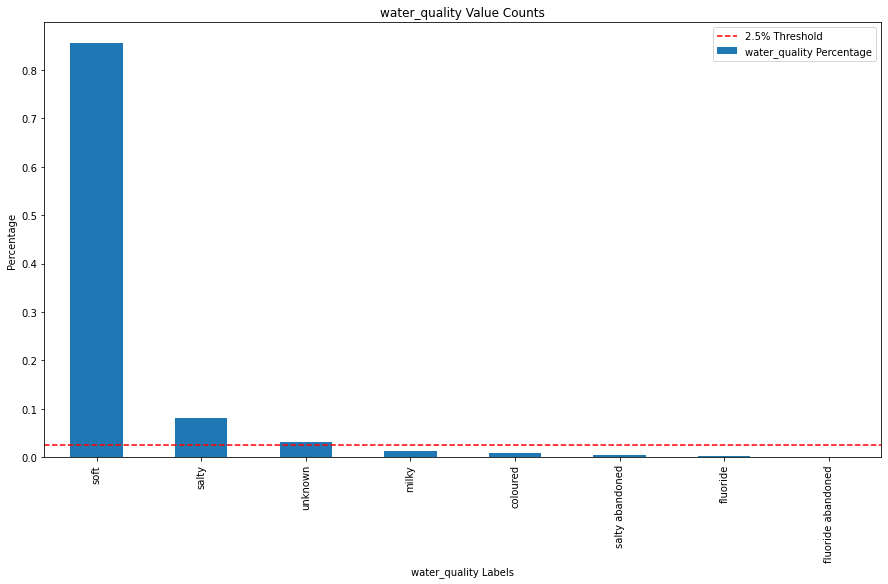



Column Name: quality_group


The number of unique labels is: 6


Value Counts Percentage 
 good       86.0
salty       9.0
unknown     3.0
milky       1.0
colored     1.0
fluoride    0.0
Name: quality_group, dtype: float64


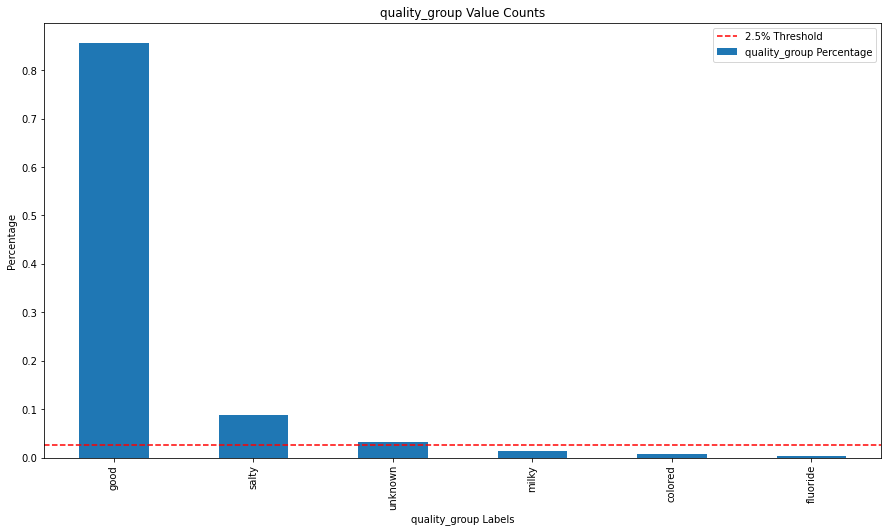

In [257]:
#eval water_quality and quality_group for dropping
cat_eval(df_clean,['water_quality','quality_group'])

In [258]:
#eval water_quality and quality_group
df_clean.groupby(by=['water_quality','quality_group']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,management,payment,quantity,source_type_2,source_type_1,waterpoint_type,status_group
water_quality,quality_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
coloured,colored,490,490,490,391,490,391,490,490,490,490,490,490,490,490,490,490,478,431,123,490,490,490,490,490,490,490,490,490,490,490
fluoride,fluoride,200,200,200,181,200,176,200,200,200,200,200,200,200,200,200,200,197,188,138,186,200,200,200,200,200,200,200,200,200,200
fluoride abandoned,fluoride,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,16,14,1,17,17,17,17,17,17,17,17,17,17,17
milky,milky,804,804,804,788,804,785,804,804,804,804,804,804,804,804,804,804,736,344,44,801,804,804,804,804,804,804,804,804,804,804
salty,salty,4856,4856,4856,4803,4856,4801,4856,4856,4856,4856,4638,4856,4856,4856,4856,4856,4485,4419,1453,4706,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856
salty abandoned,salty,339,339,339,331,339,331,339,339,339,339,338,339,339,339,339,339,239,332,62,329,339,339,339,339,339,339,339,339,339,339
soft,good,50818,50818,50818,47945,50818,47948,50818,50818,50818,50818,50666,50818,50818,50818,50818,50818,48437,48262,28629,48416,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818
unknown,unknown,1876,1876,1876,1309,1876,1296,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1478,1533,784,1399,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876


> **OBSERVATIONS**
> - `quality_group` is redundant, need to update "soft" label to "soft-good".

> **ACTIONS**
> - drop `quality_group`, update "soft" label to "soft-good" on `water_quality` feature

In [259]:
#rename soft label as soft-good
df_clean.loc[df_clean['water_quality'] == 'soft','water_quality'] = 'soft-good'

In [260]:
#drop quality_group feature
df_clean.drop(columns='quality_group', inplace=True)

In [261]:
df_clean.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,management,payment,water_quality,quantity,source_type_2,source_type_1,waterpoint_type,status_group
0,69572,"6,000.0",2011-03-14,Other,1390,Other,34.93809275,-9.85632177,none,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,gravity,vwc,pay annually,soft-good,enough,spring,groundwater,communal standpipe,functional
1,8776,0.0,2013-03-06,Other,1399,Other,34.6987661,-2.14746569,Zahanati,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280,NaN,Other,NaN,True,2010,gravity,gravity,wug,never pay,soft-good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,2013-02-25,Other,686,Other,37.46066446,-3.82132853,Kwa Mahundi,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,vwc,pay per bucket,soft-good,enough,dam,surface,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,Unicef,263,Other,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,NaN,True,1986,submersible,submersible,vwc,never pay,soft-good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,Other,0,Other,31.13084671,-1.82535885,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,0,True,NaN,NaN,True,0,gravity,gravity,other,never pay,soft-good,seasonal,rainwater harvesting,surface,communal standpipe,functional


## Duplicates

I will check for duplicates in the dataset.

In [262]:
#check for duplicates across the entire dataset
df_clean.duplicated().sum()

0

In [263]:
# check for duplicates for id feature
df_clean['id'].duplicated().sum()

0

> **OBSERVATIONS**
> - No duplicates seen

## Feature Imputation

In [264]:
#check for missing values
df_clean.isna().mean()

id                                    0.0
amount_tsh                            0.0
date_recorded                         0.0
funder                 0.0611952861952862
gps_height                            0.0
installer            0.061531986531986535
longitude                             0.0
latitude                              0.0
wpt_name                              0.0
basin                                 0.0
subvillage          0.0062457912457912455
region                                0.0
district_code                         0.0
lga                                   0.0
ward                                  0.0
population                            0.0
public_meeting        0.05612794612794613
scheme_management     0.06526936026936027
scheme_name            0.4741750841750842
permit                0.05144781144781145
construction_year                     0.0
extraction_type_2                     0.0
extraction_type_1                     0.0
management                        

> **OBSERVATIONS**
> - Missing values around 5-6% for some features and 47% for `scheme_name`

> - **ACTIONS**
> - Will evaluate imputation techniques for these missing values

In [265]:
#evaluate subvillage for imputation
df_clean['subvillage'].value_counts(dropna=False)

Madukani      508
Shuleni       506
Majengo       502
Kati          373
NaN           371
             ... 
Lwikula         1
Mwambizo        1
Kiborogota      1
Mwembemoja      1
Kibwigwa B      1
Name: subvillage, Length: 19288, dtype: int64

> **OBSERVATIONS**
> - There are 371 missing values, which is 0.6% of the rows.

> **ACTIONS**
> - I will label these as "Unknown"

In [266]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['subvillage'].isna() == True, ['subvillage']] = 'Unknown'
df_clean['subvillage'].value_counts(dropna=False)

Madukani    508
Shuleni     506
Majengo     502
Kati        373
Unknown     371
           ... 
Doga Juu      1
Fugwe         1
Mbitio        1
Rumeya        1
Tawine        1
Name: subvillage, Length: 19288, dtype: int64

In [267]:
#evaluate funder for imputation
df_clean['funder'].value_counts(dropna=False)

Other                     26939
Government Of Tanzania     9084
NaN                        3635
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        811
Unknown                     777
Norad                       765
Germany Republi             610
Tcrs                        602
Ministry Of Water           590
Water                       583
Name: funder, dtype: int64

> **OBSERVATIONS**
> - There are 3635 missing values, which is 6% of the rows.

> **ACTIONS**
> - I will combine these with the "Unknown" label

In [268]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['funder'].isna() == True, ['funder']] = 'Unknown'
df_clean['funder'].value_counts(dropna=False)

Other                     26939
Government Of Tanzania     9084
Unknown                    4412
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        811
Norad                       765
Germany Republi             610
Tcrs                        602
Ministry Of Water           590
Water                       583
Name: funder, dtype: int64

In [269]:
#evaluate installer for imputation
df_clean['installer'].value_counts(dropna=False)

Other                 28745
DWE                   17402
NaN                    3655
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
Unknown                 780
TCRS                    707
Central government      622
CES                     610
Name: installer, dtype: int64

> **OBSERVATIONS**
> - There are 3655 missing values, which is 6% of the rows.

> **ACTIONS**
> - I will combine these with the "Unknown" label

In [270]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['installer'].isna() == True, ['installer']] = 'Unknown'
df_clean['installer'].value_counts(dropna=False)

Other                 28745
DWE                   17402
Unknown                4435
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
TCRS                    707
Central government      622
CES                     610
Name: installer, dtype: int64

In [271]:
#evaluate permit for imputation
df_clean['permit'].value_counts(dropna=False)

True     38852
False    17492
NaN       3056
Name: permit, dtype: int64

> **OBSERVATIONS**
> - There are 3056 missing values, which is 5% of the rows.

> **ACTIONS**
> - I will rename these "unknown"

In [272]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['permit'].isna() == True, ['permit']] = 'Unknown'
df_clean['permit'].value_counts(dropna=False)

True       38852
False      17492
Unknown     3056
Name: permit, dtype: int64

In [273]:
#evaluate public_meeting for imputation
df_clean['public_meeting'].value_counts(dropna=False)

True     51011
False     5055
NaN       3334
Name: public_meeting, dtype: int64

> **OBSERVATIONS**
> - There are 3334 missing values, which is 5% of the rows.

> **ACTIONS**
> - I will rename these "Unknown" 

In [274]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['public_meeting'].isna() == True, ['public_meeting']] = 'Unknown'
df_clean['public_meeting'].value_counts(dropna=False)

True       51011
False       5055
Unknown     3334
Name: public_meeting, dtype: int64

In [275]:
#evaluate scheme_name for imputation
df_clean['scheme_name'].value_counts(dropna=False)

NaN                          28166
K                              682
None                           644
Borehole                       546
Chalinze wate                  405
                             ...  
Mradi wa maji wa pitio           1
TASAF DAM                        1
Magoto piped Water seplly        1
Merali Juu line                  1
Serian maji salama               1
Name: scheme_name, Length: 2697, dtype: int64

> **OBSERVATIONS**
> - There are 28,166 missing values, which is 47% of the rows.

> **ACTIONS**
> - I will rename these "Unknown" 

In [276]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['scheme_name'].isna() == True, ['scheme_name']] = 'Unknown'
df_clean['scheme_name'].value_counts(dropna=False)

Unknown                                28166
K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
                                       ...  
NYA /MAK BUK/ piped scheme                 1
Mwamanoni village water pipe scheme        1
Dam piped scheme                           1
Nkea                                       1
Welela Shallow well                        1
Name: scheme_name, Length: 2697, dtype: int64

In [277]:
#evaluate scheme_management for imputation
df_clean['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

> **OBSERVATIONS**
> - There are 3,877 missing values, which is 6% of the rows.

> **ACTIONS**
> - I will rename these "Unknown" 

In [278]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['scheme_management'].isna() == True, ['scheme_management']] = 'Unknown'
df_clean['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
Unknown              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

## Feature Creation

In this section I will develop new features which I believe will improve the ability to gain insights into the data and possibly help modeling.

In [279]:
#current features
df_clean.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type_2', 'extraction_type_1',
       'management', 'payment', 'water_quality', 'quantity', 'source_type_2',
       'source_type_1', 'waterpoint_type', 'status_group'],
      dtype='object')

### `well_age`

`well_age` will allow insight into how age of the well impacts operability. This feature will be created by taking the `recorded_date` and subtracting the `construction_year`. I will need to see how I can impute when the `construction_year` is "0" and will need to create a `failure_year` feature as well.

In [280]:
#create failure_year feature
df_clean['failure_year'] = pd.DatetimeIndex(df_clean['date_recorded']).year
df_clean[['failure_year','date_recorded']].head()

,failure_year,date_recorded
0,2011,2011-03-14
1,2013,2013-03-06
2,2013,2013-02-25
3,2013,2013-01-28
4,2011,2011-07-13


In [281]:
#check for failure year earlier than construction year
df_clean.loc[df_clean['failure_year'] < df_clean['construction_year'], ['id']].count()

id    9
dtype: int64

> **OBSERVATIONS**
> - There are 9 records where the date_recorded year is prior to the construction year. 

> **ACTIONS**
> - I will remove these 9 rows.

In [282]:
#drop 9 rows
df_clean.drop(df_clean.loc[df_clean['failure_year'] < 
                           df_clean['construction_year']].index, inplace=True)

In [283]:
#check for failure year earlier than construction year
df_clean.loc[df_clean['failure_year'] < df_clean['construction_year'], ['id']].count()

id    0
dtype: int64

In [284]:
#value counts of construction_year
df_clean['construction_year'].value_counts().head(10)

0       20709
2010     2645
2008     2611
2009     2530
2000     2091
2007     1586
2006     1470
2003     1286
2011     1255
2004     1123
Name: construction_year, dtype: int64

construction_year   1,996.8120831394447
dtype: float64
construction_year   2,000.0
dtype: float64


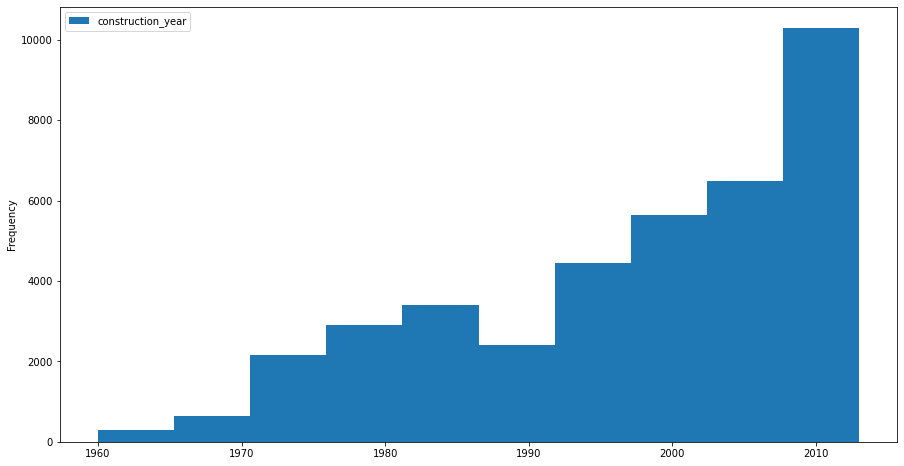

In [285]:
#histogram of construction_year without 0's
fig, ax = plt.subplots(figsize=(15,8))
df_clean.loc[df_clean['construction_year'] != 0,
             ['construction_year']].plot(kind='hist', ax=ax)
print(df_clean.loc[df_clean['construction_year'] != 0,['construction_year']].mean())
print(df_clean.loc[df_clean['construction_year'] != 0,['construction_year']].median())

> **OBSERVATIONS**
> - I do not see a good value to impute `construction_year` with as the data is skewed heavily

> **ACTIONS**
> - I will create the `well_age` feature and mark any which equate to "0" as "Unknown" for any row which has a `construction_year` of "0"

In [286]:
#create well_age feature
df_clean['well_age'] = df_clean['failure_year'] - df_clean['construction_year']
df_clean['well_age'].value_counts().head()

2011    13343
2012     5142
3        2740
1        2303
2013     2210
Name: well_age, dtype: int64

In [287]:
#convert construction_year = 0 to "Unknown"
df_clean.loc[df_clean['construction_year'] == 0,['well_age']] = "Unknown"

In [288]:
#check value counts
df_clean['well_age'].value_counts().head()

Unknown    20709
3           2740
1           2303
2           2129
5           1980
Name: well_age, dtype: int64

In [289]:
df_clean

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,management,payment,water_quality,quantity,source_type_2,source_type_1,waterpoint_type,status_group,failure_year,well_age
0,69572,"6,000.0",2011-03-14,Other,1390,Other,34.93809275,-9.85632177,none,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,gravity,vwc,pay annually,soft-good,enough,spring,groundwater,communal standpipe,functional,2011,12
1,8776,0.0,2013-03-06,Other,1399,Other,34.6987661,-2.14746569,Zahanati,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280,Unknown,Other,Unknown,True,2010,gravity,gravity,wug,never pay,soft-good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013,3
2,34310,25.0,2013-02-25,Other,686,Other,37.46066446,-3.82132853,Kwa Mahundi,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,vwc,pay per bucket,soft-good,enough,dam,surface,communal standpipe multiple,functional,2013,4
3,67743,0.0,2013-01-28,Unicef,263,Other,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,Unknown,True,1986,submersible,submersible,vwc,never pay,soft-good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,2013,27
4,19728,0.0,2011-07-13,Other,0,Other,31.13084671,-1.82535885,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,0,True,Unknown,Unknown,True,0,gravity,gravity,other,never pay,soft-good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.16980689,-3.25384746,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,5,Hai,Masama Magharibi,125,True,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,water board,pay per bucket,soft-good,enough,spring,groundwater,communal standpipe,functional,2013,14
59396,27263,"4,700.0",2011-05-07,Other,1212,Other,35.24999126,-9.0706288,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,4,Njombe,Ikondo,56,True,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,vwc,pay annually,soft-good,enough,river,surface,communal standpipe,functional,2011,15
59397,37057,0.0,2011-04-11,Unknown,0,Unknown,34.01708706,-8.75043433,Mashine,Rufiji,Madungulu,Mbeya,7,Mbarali,Chimala,0,True,VWC,Unknown,False,0,swn 80,handpump,vwc,pay monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional,2011,Unknown
59398,31282,0.0,2011-03-08,Other,0,Other,35.86131531,-6.37857327,Mshoro,Rufiji,Mwinyi,Dodoma,4,Chamwino,Mvumi Makulu,0,True,VWC,Unknown,True,0,nira/tanira,handpump,vwc,never pay,soft-good,insufficient,shallow well,groundwater,hand pump,functional,2011,Unknown


## Feature Renaming

I will review feature names and make logical changes in naming and in ordering.

In [290]:
#column names
df_clean.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type_2', 'extraction_type_1',
       'management', 'payment', 'water_quality', 'quantity', 'source_type_2',
       'source_type_1', 'waterpoint_type', 'status_group', 'failure_year',
       'well_age'],
      dtype='object')

In [291]:
#rename features
df_clean.rename(columns={'amount_tsh':'head','gps_height':'well_elevation',
                         'quantity':'water_quantity','payment':'water_cost'},
                inplace=True)
df_clean.columns

Index(['id', 'head', 'date_recorded', 'funder', 'well_elevation', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type_2', 'extraction_type_1', 'management', 'water_cost',
       'water_quality', 'water_quantity', 'source_type_2', 'source_type_1',
       'waterpoint_type', 'status_group', 'failure_year', 'well_age'],
      dtype='object')

In [292]:
#reorder features
df_clean = df_clean[['id','wpt_name','construction_year','failure_year','well_age',
                     'waterpoint_type','water_quality','water_quantity','head',
                     'source_type_1','source_type_2','extraction_type_1',
                     'extraction_type_2','well_elevation','population','date_recorded',
                     'status_group','latitude','longitude','basin',
                     'subvillage','region','district_code','lga','ward',
                     'funder','installer','permit','public_meeting',
                     'scheme_name','scheme_management','management','water_cost']]

In [293]:
#looking at dataset
df_clean.head()

,id,wpt_name,construction_year,failure_year,well_age,waterpoint_type,water_quality,water_quantity,head,source_type_1,source_type_2,extraction_type_1,extraction_type_2,well_elevation,population,date_recorded,status_group,latitude,longitude,basin,subvillage,region,district_code,lga,ward,funder,installer,permit,public_meeting,scheme_name,scheme_management,management,water_cost
0,69572,none,1999,2011,12,communal standpipe,soft-good,enough,"6,000.0",groundwater,spring,gravity,gravity,1390,109,2011-03-14,functional,-9.85632177,34.93809275,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,Other,Other,False,True,Roman,VWC,vwc,pay annually
1,8776,Zahanati,2010,2013,3,communal standpipe,soft-good,insufficient,0.0,surface,rainwater harvesting,gravity,gravity,1399,280,2013-03-06,functional,-2.14746569,34.6987661,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,Other,Other,True,Unknown,Unknown,Other,wug,never pay
2,34310,Kwa Mahundi,2009,2013,4,communal standpipe multiple,soft-good,enough,25.0,surface,dam,gravity,gravity,686,250,2013-02-25,functional,-3.82132853,37.46066446,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,Other,Other,True,True,Nyumba ya mungu pipe scheme,VWC,vwc,pay per bucket
3,67743,Zahanati Ya Nanyumbu,1986,2013,27,communal standpipe multiple,soft-good,dry,0.0,groundwater,machine dbh,submersible,submersible,263,58,2013-01-28,non functional,-11.15529772,38.48616088,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,Unicef,Other,True,True,Unknown,VWC,vwc,never pay
4,19728,Shuleni,0,2011,Unknown,communal standpipe,soft-good,seasonal,0.0,surface,rainwater harvesting,gravity,gravity,0,0,2011-07-13,functional,-1.82535885,31.13084671,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,Other,Other,True,True,Unknown,Unknown,other,never pay


# DATA EXPLORATION

In this section I will explore the clean data to try and examine insights that will help my stakeholder understand the reliability of the water wells.

In [294]:
#create copy of df_clean
df_explore = df_clean.copy()

How have failures changed over time? x = date_recorded(month) and y equals sum of failures

Question: How does surrounding population affect failure rate?

Question: How does location affect failure rate?


In [295]:
# failure_df = pd.DataFrame(df_explore.groupby(by=['construction_year','status_group'])[['id']].count())

In [296]:
# percent_df = failure_df.groupby(level=0).apply(lambda x: x / float(x.sum())*100)
# percent_df.reset_index(inplace=True)
# percent_df = percent_df.loc[(percent_df['status_group'] == 'functional') & (percent_df['construction_year'] != 0)]

In [297]:
# fig, ax = plt.subplots(figsize=(15,8))
# fig = plt.bar(x=percent_df['construction_year'], height=percent_df['id'])
# plt.xlim(1959,2014)

# DATA MODELING

In this section I will be developing and iterating on a classification model to predict whether a well is function, not function or functional needs repair. Before modeling, I will complete feature engineering steps to ensure the models can predict accurately.

In [298]:
#create a modeling dataframe
df_model = df_explore.copy()

## Removing Features

There are a few features which are good for visualization but aren't appropriate for modeling.

In [299]:
#review categorical features
cat_cols = df_model.select_dtypes(include='object')
cat_cols

,id,wpt_name,well_age,waterpoint_type,water_quality,water_quantity,source_type_1,source_type_2,extraction_type_1,extraction_type_2,status_group,basin,subvillage,region,district_code,lga,ward,funder,installer,permit,public_meeting,scheme_name,scheme_management,management,water_cost
0,69572,none,12,communal standpipe,soft-good,enough,groundwater,spring,gravity,gravity,functional,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,Other,Other,False,True,Roman,VWC,vwc,pay annually
1,8776,Zahanati,3,communal standpipe,soft-good,insufficient,surface,rainwater harvesting,gravity,gravity,functional,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,Other,Other,True,Unknown,Unknown,Other,wug,never pay
2,34310,Kwa Mahundi,4,communal standpipe multiple,soft-good,enough,surface,dam,gravity,gravity,functional,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,Other,Other,True,True,Nyumba ya mungu pipe scheme,VWC,vwc,pay per bucket
3,67743,Zahanati Ya Nanyumbu,27,communal standpipe multiple,soft-good,dry,groundwater,machine dbh,submersible,submersible,non functional,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,Unicef,Other,True,True,Unknown,VWC,vwc,never pay
4,19728,Shuleni,Unknown,communal standpipe,soft-good,seasonal,surface,rainwater harvesting,gravity,gravity,functional,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,Other,Other,True,True,Unknown,Unknown,other,never pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,Area Three Namba 27,14,communal standpipe,soft-good,enough,groundwater,spring,gravity,gravity,functional,Pangani,Kiduruni,Kilimanjaro,5,Hai,Masama Magharibi,Germany Republi,CES,True,True,Losaa Kia water supply,Water Board,water board,pay per bucket
59396,27263,Kwa Yahona Kuvala,15,communal standpipe,soft-good,enough,surface,river,gravity,gravity,functional,Rufiji,Igumbilo,Iringa,4,Njombe,Ikondo,Other,Other,True,True,Ikondo electrical water sch,VWC,vwc,pay annually
59397,37057,Mashine,Unknown,hand pump,fluoride,enough,groundwater,machine dbh,handpump,swn 80,functional,Rufiji,Madungulu,Mbeya,7,Mbarali,Chimala,Unknown,Unknown,False,True,Unknown,VWC,vwc,pay monthly
59398,31282,Mshoro,Unknown,hand pump,soft-good,insufficient,groundwater,shallow well,handpump,nira/tanira,functional,Rufiji,Mwinyi,Dodoma,4,Chamwino,Mvumi Makulu,Other,Other,True,True,Unknown,VWC,vwc,never pay


> **OBSERVATIONS**
> - `id` and `wpt_name` are both unique identifiers in the case of `id` or are mostly unique in the case of `wpt_name`

> **ACTIONS**
> - remove `id` and `wpt_name`

In [300]:
#drop id and wpt_name
df_model.drop(columns=['id','wpt_name'], inplace=True)

In [301]:
#review numerical features
num_cols = df_model.select_dtypes(exclude='object')
num_cols

,construction_year,failure_year,head,well_elevation,population,date_recorded,latitude,longitude
0,1999,2011,"6,000.0",1390,109,2011-03-14,-9.85632177,34.93809275
1,2010,2013,0.0,1399,280,2013-03-06,-2.14746569,34.6987661
2,2009,2013,25.0,686,250,2013-02-25,-3.82132853,37.46066446
3,1986,2013,0.0,263,58,2013-01-28,-11.15529772,38.48616088
4,0,2011,0.0,0,0,2011-07-13,-1.82535885,31.13084671
...,...,...,...,...,...,...,...,...
59395,1999,2013,10.0,1210,125,2013-05-03,-3.25384746,37.16980689
59396,1996,2011,"4,700.0",1212,56,2011-05-07,-9.0706288,35.24999126
59397,0,2011,0.0,0,0,2011-04-11,-8.75043433,34.01708706
59398,0,2011,0.0,0,0,2011-03-08,-6.37857327,35.86131531


> **OBSERVATIONS**
> - `date_recorded`, `latitude` and `longitude` are not features that should be utilized in the model

> **ACTIONS**
> - remove `date_recorded`, `latitude` and `longitude`

In [302]:
#drop date_recorded, lat and long
df_model.drop(columns=['date_recorded','latitude','longitude'], inplace=True)

## Train-Test Split

In [303]:
#create X and y dataframes
X = df_model.drop(columns=['status_group'])
y = df_model['status_group']

In [304]:
#create train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Dummy Classifier Model

The dummy model will predict the exact same distribution for the target variable, `status_group`, as is in the data. This model will be equivalent to randomly guessing and will be a good baseline to evaluate other models against.

In [307]:
#create the dummy model
dummy_model = DummyClassifier()

In [310]:
#fit the dummy model
dummy_model.fit(X_train, y_train)

/Users/brian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier()

In [311]:
#score (accuracy) the dummy classifier using cross validation
cross_val_score(dummy_model, X_train, y_train)

/Users/brian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


array([0.44550455, 0.4480862 , 0.45291278, 0.43769645, 0.43320611])

> **OBSERVATIONS**
> - The mean accuracy at the moment is around 44%

In [ ]:
#print the classification report
classification_report()

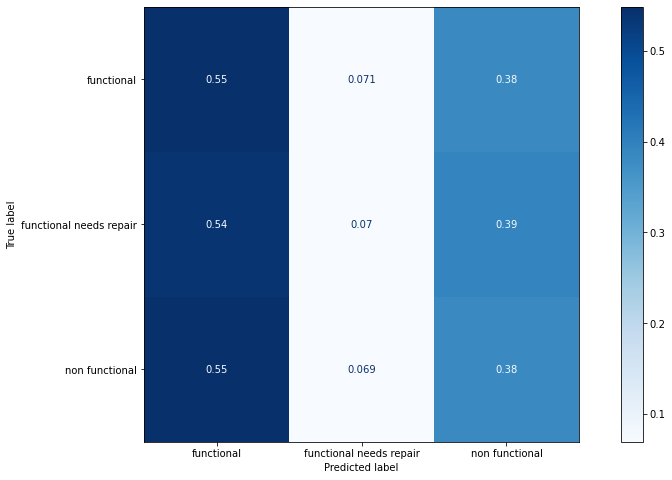

In [319]:
#plot the confusion matrix
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(dummy_model, X_train, y_train, cmap='Blues', normalize='true', ax=ax)

## Logistic Regression Pipeline

For logistic regression modeling, I will need to do the following preprocessing steps:
1. Missing Value Imputation
2. Scale numeric features
3. Investigate Outliers
4. Encode categorical features

### Missing Value Imputation

In [305]:
#check for missing values
X_train.isna().mean()

construction_year   0.0
failure_year        0.0
well_age            0.0
waterpoint_type     0.0
water_quality       0.0
water_quantity      0.0
head                0.0
source_type_1       0.0
source_type_2       0.0
extraction_type_1   0.0
extraction_type_2   0.0
well_elevation      0.0
population          0.0
basin               0.0
subvillage          0.0
region              0.0
district_code       0.0
lga                 0.0
ward                0.0
funder              0.0
installer           0.0
permit              0.0
public_meeting      0.0
scheme_name         0.0
scheme_management   0.0
management          0.0
water_cost          0.0
dtype: float64

> **OBSERVATIONS**
> - No missing values to impute 

### Logistic Regression Pipeline

In [ ]:
#create a LR pipeline
lr_pipeline = Pipeline([('scaler',StandardScaler()),
                         ('ohe', OneHotEncoder())])

In [ ]:
#create a gridsearch


## Decision Tree Pipeline

## Feature Engineering

I will conduct feature engineering as part of my modeling pipeline. However, I need to first prepare the data first.

#### Imputation

#### Outliers

#### Transformation

### Categorical Features

#### Cardinality and Rare Labels

#### Label Renaming

#### Imputation

#### Transformation

### New Features Creation

Create Time to Failure Feature using `construction_year` and `date_recorded`

duplicate failures?

# MODEL INTERPRETATION

# RECOMMENDATIONS AND CONCLUSIONS

# Appendix

## Export to Tableau

### Clean up Dataset for Tableau

In [217]:
#export original dataframe to Tableau
#df_explore.to_csv(r'Data/water_well_data_for_tableau.csv', index=False, header=True)